Location            1001        1002                    1005
Year                2021        2021        2022        2021
Hourly Index                                                
0             468.632629  318.082349  258.236675  140.087518
1             364.574606  310.691438  286.157470  146.973496
2             265.846894  353.223856  272.350332  142.524382


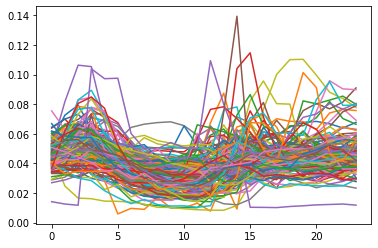

[[0.06127541 0.04766944 0.03476044 ... 0.0667872  0.06395057 0.06772276]
 [0.04589496 0.04482855 0.0509654  ... 0.05133266 0.05128443 0.05337449]
 [0.05049076 0.05594986 0.05325028 ... 0.05499263 0.05472023 0.05484293]
 ...
 [0.04838377 0.05565832 0.05609003 ... 0.05256194 0.04916385 0.04203887]
 [0.05083614 0.0478574  0.04431949 ... 0.05586945 0.05670745 0.0602975 ]
 [0.0553458  0.05338807 0.05175254 ... 0.05345271 0.05313443 0.04944159]]


In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

from Navajo_Load_Profiles_Functions import *


folders = create_folders()

avg_load_profiles_df = pd.read_csv(f"{folders['Aggregated Load Profiles']}\\Avg Weekend Load Profiles.csv", index_col=[0], header=[0, 1])
hourly_load_profiles_df = calc_hourly_df(avg_load_profiles_df)
hourly_load_profiles_df = hourly_load_profiles_df.loc[:, (hourly_load_profiles_df >= 0).all()]  # crop out cols with negatives
hourly_load_profiles_df = hourly_load_profiles_df.loc[:, (hourly_load_profiles_df.columns != ('1089', '2021')) & (hourly_load_profiles_df.columns != ('1041', '2021'))]
print(hourly_load_profiles_df.iloc[:3, :4])

X = hourly_load_profiles_df.loc[:, hourly_load_profiles_df.columns].values
X = X.T
X_norm = sklearn.preprocessing.normalize(X, norm='l1', axis=1)
plt.plot(X_norm.T)
plt.show()
print(X_norm)

C:\Users\soshe\AppData\Local\Temp/ipykernel_11288/3580563966.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  silscore_by_cluster = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')
C:\Users\soshe\AppData\Local\Temp/ipykernel_11288/3580563966.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  test = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')


Num vals in 0: 13


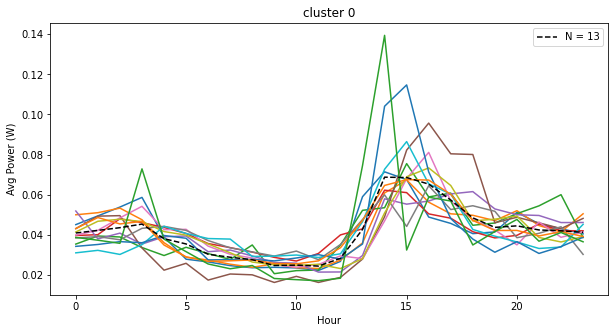

Num vals in 1: 14


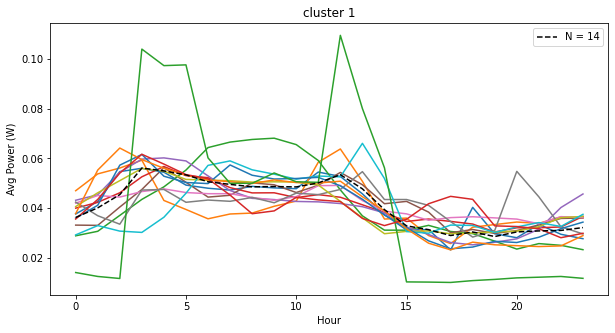

Num vals in 2: 12


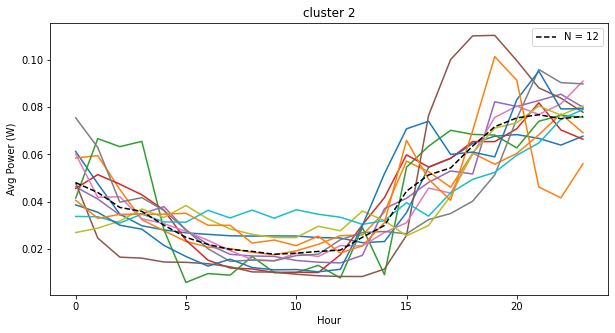

Num vals in 3: 60


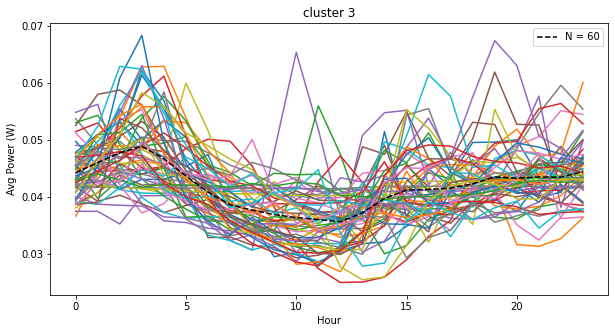

Num vals in 4: 22


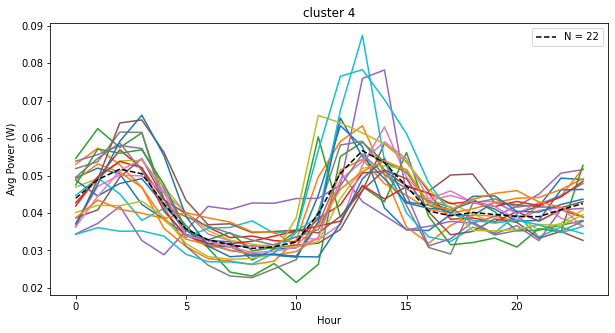

Num vals in 5: 18


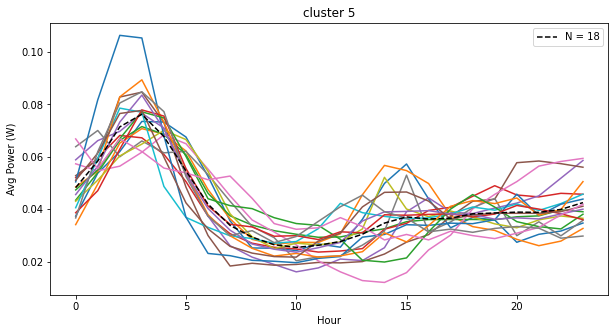

Num vals in 6: 39


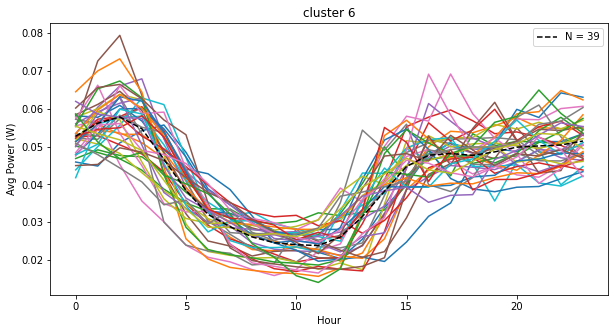

In [13]:
# Plot all lines in each cluster with cluster centers
n_clusters = 7
km = KMeans(n_clusters=n_clusters, init='random', n_init=30, max_iter=500, random_state=0)
y_km = km.fit_predict(X_norm)

silscore_by_cluster = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')
test = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')
silsample_scores = metrics.silhouette_samples(X_norm, km.labels_)

for cluster_num in range(n_clusters):
    # silsample_score[cluster_num] = metrics.silhouette_samples(X_norm[km.labels_ == cluster_num], km.labels_[km.labels_ == cluster_num])
    silscore_by_cluster[cluster_num] = np.mean(silsample_scores[km.labels_ == cluster_num])

    plt.figure(figsize=(10,5))
    print(f"Num vals in {cluster_num}: {sum(km.labels_ == cluster_num)}")
    plt.plot(X_norm[km.labels_ == cluster_num].T)

    plt.plot(km.cluster_centers_[cluster_num], linestyle='--', color='k', label=f"N = {sum(km.labels_ == cluster_num)}")

    plt.title(f"cluster {cluster_num}")
    plt.legend()
    plt.ylabel("Avg Power (W)")
    plt.xlabel("Hour")
    # plt.ax
    plt.show()

Num vals in 0: 81
Num vals in 1: 83
Num vals in 2: 14


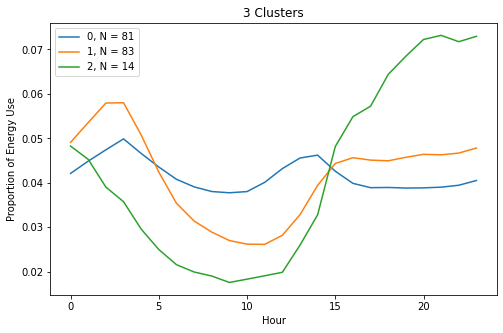

Num vals in 0: 14
Num vals in 1: 36
Num vals in 2: 31
Num vals in 3: 97


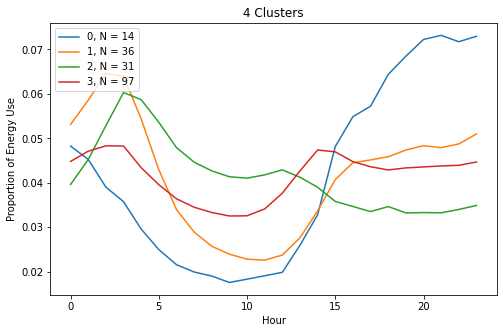

Num vals in 0: 13
Num vals in 1: 28
Num vals in 2: 82
Num vals in 3: 42
Num vals in 4: 13


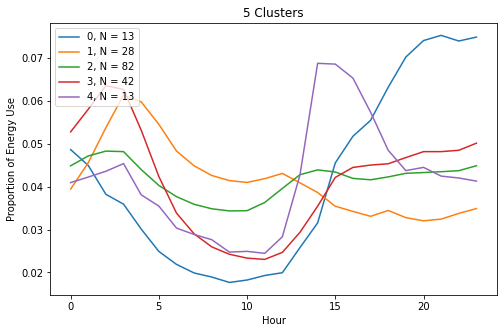

Num vals in 0: 44
Num vals in 1: 14
Num vals in 2: 12
Num vals in 3: 62
Num vals in 4: 28
Num vals in 5: 18


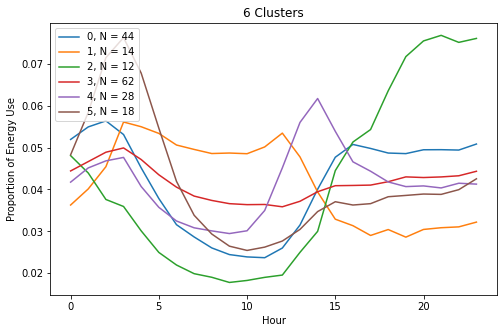

Num vals in 0: 13
Num vals in 1: 14
Num vals in 2: 12
Num vals in 3: 60
Num vals in 4: 22
Num vals in 5: 18
Num vals in 6: 39


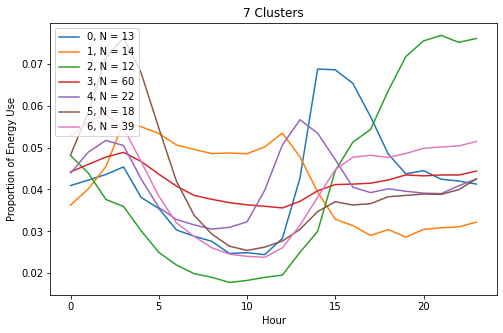

Num vals in 0: 13
Num vals in 1: 40
Num vals in 2: 12
Num vals in 3: 1
Num vals in 4: 13
Num vals in 5: 26
Num vals in 6: 55
Num vals in 7: 18


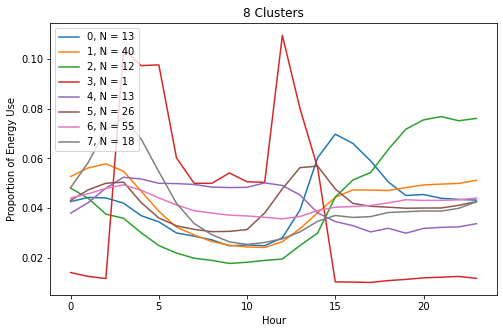

Num vals in 0: 12
Num vals in 1: 31
Num vals in 2: 12
Num vals in 3: 1
Num vals in 4: 12
Num vals in 5: 40
Num vals in 6: 44
Num vals in 7: 18
Num vals in 8: 8


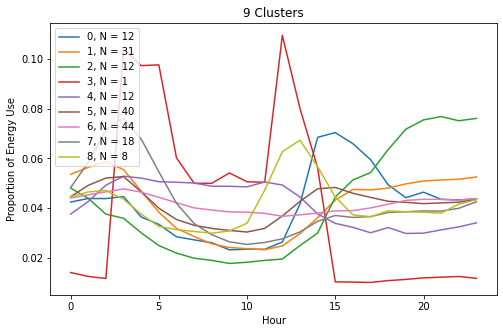

Num vals in 0: 12
Num vals in 1: 7
Num vals in 2: 32
Num vals in 3: 22
Num vals in 4: 14
Num vals in 5: 27
Num vals in 6: 13
Num vals in 7: 16
Num vals in 8: 1
Num vals in 9: 34


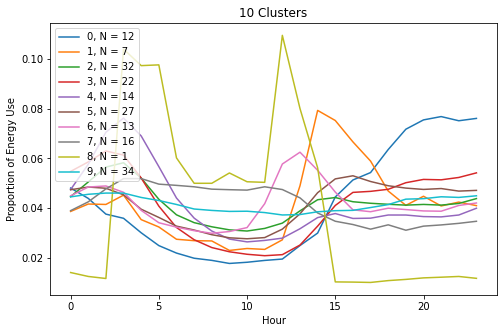

Num vals in 0: 39
Num vals in 1: 25
Num vals in 2: 18
Num vals in 3: 4
Num vals in 4: 20
Num vals in 5: 32
Num vals in 6: 1
Num vals in 7: 2
Num vals in 8: 8
Num vals in 9: 16
Num vals in 10: 13


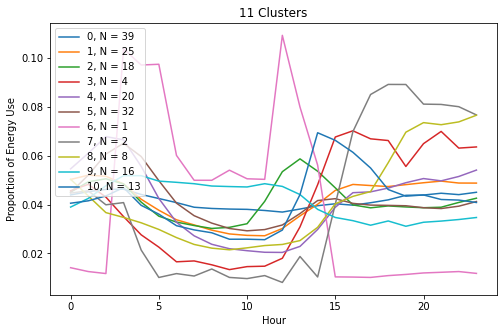

Num vals in 0: 12
Num vals in 1: 11
Num vals in 2: 29
Num vals in 3: 21
Num vals in 4: 33
Num vals in 5: 1
Num vals in 6: 18
Num vals in 7: 6
Num vals in 8: 4
Num vals in 9: 1
Num vals in 10: 26
Num vals in 11: 16


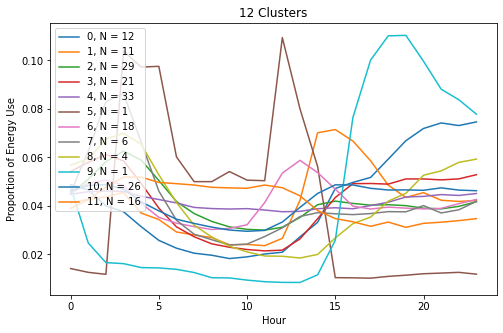

Num vals in 0: 34
Num vals in 1: 17
Num vals in 2: 15
Num vals in 3: 4
Num vals in 4: 10
Num vals in 5: 25
Num vals in 6: 1
Num vals in 7: 2
Num vals in 8: 8
Num vals in 9: 16
Num vals in 10: 9
Num vals in 11: 12
Num vals in 12: 25


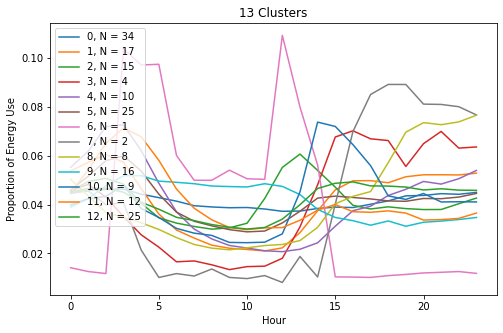

Num vals in 0: 12
Num vals in 1: 11
Num vals in 2: 8
Num vals in 3: 17
Num vals in 4: 24
Num vals in 5: 1
Num vals in 6: 11
Num vals in 7: 7
Num vals in 8: 3
Num vals in 9: 1
Num vals in 10: 31
Num vals in 11: 12
Num vals in 12: 13
Num vals in 13: 27


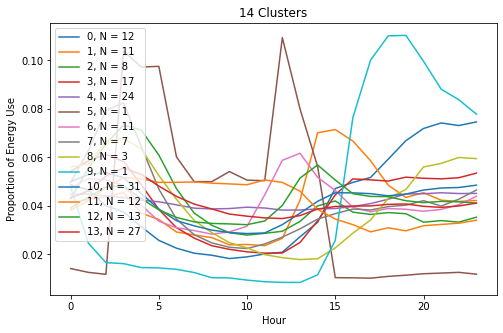

Num vals in 0: 12
Num vals in 1: 11
Num vals in 2: 7
Num vals in 3: 18
Num vals in 4: 24
Num vals in 5: 1
Num vals in 6: 10
Num vals in 7: 8
Num vals in 8: 3
Num vals in 9: 1
Num vals in 10: 21
Num vals in 11: 12
Num vals in 12: 11
Num vals in 13: 20
Num vals in 14: 19


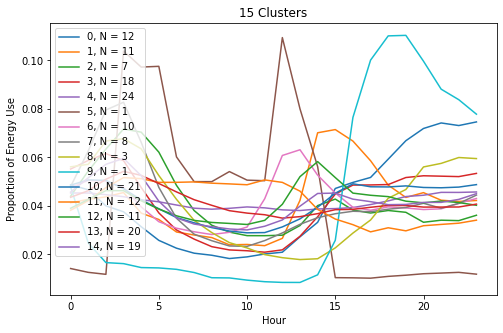

In [14]:
# Plot only the cluster centers
info_df = pd.DataFrame()
for n_clusters in range(3, 16):
    km = KMeans(n_clusters=n_clusters, init='random', n_init=30, max_iter=500, random_state=0)
    y_km = km.fit_predict(X_norm)

    info_df.loc[n_clusters, 'inertia'] = km.inertia_
    info_df.loc[n_clusters, 'logscore'] = np.log(-km.score(X_norm))
    info_df.loc[n_clusters, 'silscore'] = metrics.silhouette_score(X_norm, y_km)

    plt.figure(figsize=(8,5))
    for i in list(set(km.labels_)):
        print(f"Num vals in {i}: {sum(km.labels_ == i)}")
        plt.plot(
            km.cluster_centers_[i],
            label=f'{i}, N = {sum(km.labels_ == i)}'
        )

    plt.legend(scatterpoints=1)
    plt.title(f"{n_clusters} Clusters")
    plt.ylabel("Proportion of Energy Use")
    plt.xlabel("Hour")
    plt.legend(loc='upper left')
    plt.show()

     inertia  logscore  silscore
3   0.332799 -1.100218  0.186307
4   0.291433 -1.232947  0.191964
5   0.262257 -1.338432  0.198155
6   0.237093 -1.439305  0.186554
7   0.217565 -1.525259  0.190912
8   0.201547 -1.601731  0.190099
9   0.191062 -1.655159  0.161920
10  0.182729 -1.699750  0.153408
11  0.176378 -1.735129  0.152638
12  0.166072 -1.795331  0.149584
13  0.159927 -1.833041  0.151854
14  0.155366 -1.861971  0.140543
15  0.151325 -1.888328  0.130031


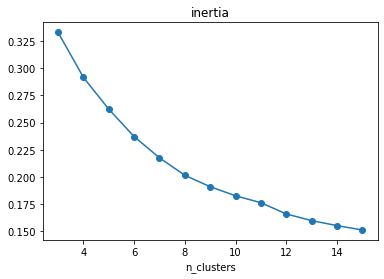

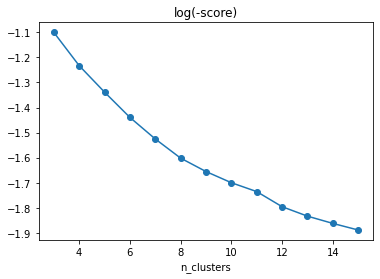

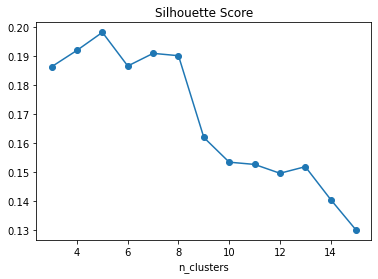

In [15]:
print(info_df)
plt.plot(info_df.index, info_df['inertia'], marker='o')
plt.title('inertia')
plt.xlabel('n_clusters')
plt.show()

plt.plot(info_df.index, info_df['logscore'], marker='o')
plt.title('log(-score)')
plt.xlabel('n_clusters')
plt.show()

plt.plot(info_df.index, info_df['silscore'], marker='o')
plt.title('Silhouette Score')
plt.xlabel('n_clusters')
plt.show()

     inertia  logscore  silscore
3   0.041366  0.132729 -0.005656
4   0.029176  0.105485 -0.006192
5   0.025164  0.100873  0.011601
6   0.019528  0.085954 -0.004357
7   0.016017  0.076472  0.000812
8   0.010486  0.053428  0.028179
9   0.008332  0.044591  0.008512
10  0.006352  0.035379  0.000770
11  0.010305  0.060203  0.003054
12  0.006146  0.037709 -0.002270
13  0.004560  0.028930  0.011311
14  0.004041  0.026357  0.010512
15       NaN       NaN       NaN


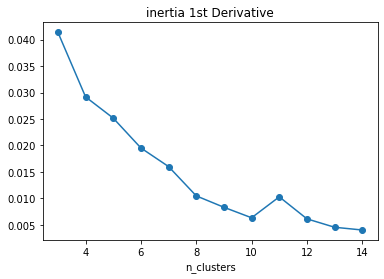

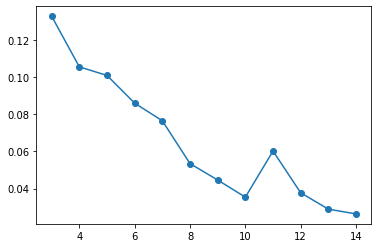

In [16]:
# info_diff_df = (info_df.diff(-2) + info_df.diff(-1)) / 2
info_diff_df = info_df.diff(-1)
print(info_diff_df)
plt.plot(info_diff_df.index, info_diff_df['inertia'], marker='o')
plt.title('inertia 1st Derivative')
plt.xlabel('n_clusters')
plt.show()
plt.plot(info_diff_df.index, info_diff_df['logscore'], marker='o')
plt.show()

     inertia  logscore  silscore
3   0.012190  0.027244  0.000535
4   0.004012  0.004612 -0.017792
5   0.005636  0.014919  0.015958
6   0.003510  0.009482 -0.005170
7   0.005532  0.023044 -0.027367
8   0.002153  0.008838  0.019667
9   0.001981  0.009212  0.007742
10 -0.003953 -0.024824 -0.002284
11  0.004159  0.022494  0.005324
12  0.001585  0.008779 -0.013580
13  0.000519  0.002574  0.000798
14       NaN       NaN       NaN
15       NaN       NaN       NaN


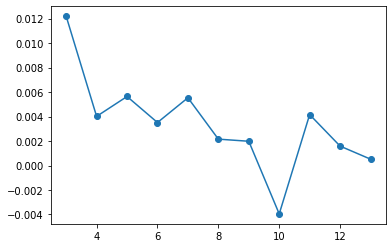

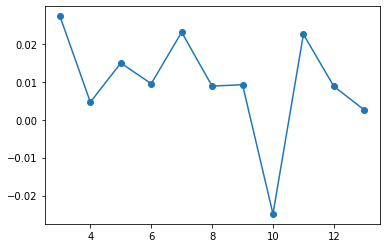

In [17]:
info_d2_df = info_df.diff(-1) - info_df.shift(-1).diff(-1)
print(info_d2_df)
plt.plot(info_d2_df.index, info_d2_df['inertia'], marker='o')
plt.show()
plt.plot(info_d2_df.index, info_d2_df['logscore'], marker='o')
plt.show()

0    0.051357
1    0.114296
2    0.128178
3    0.288895
4    0.136436
5    0.139643
6    0.187885
Name: Cluster #, dtype: float64


<BarContainer object of 7 artists>

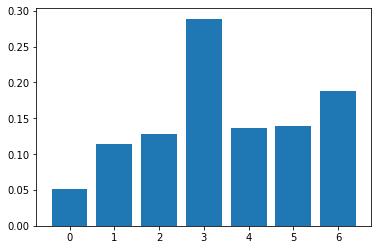

In [18]:
print(silscore_by_cluster)
plt.bar(silscore_by_cluster.index, silscore_by_cluster.values)